In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [5]:
df_DA_US = df_DA_US.explode('job_skills')

In [8]:
dfdaus_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [15]:
df_toppay = dfdaus_group.sort_values(by='median', ascending=False).head(10)
df_popular = dfdaus_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

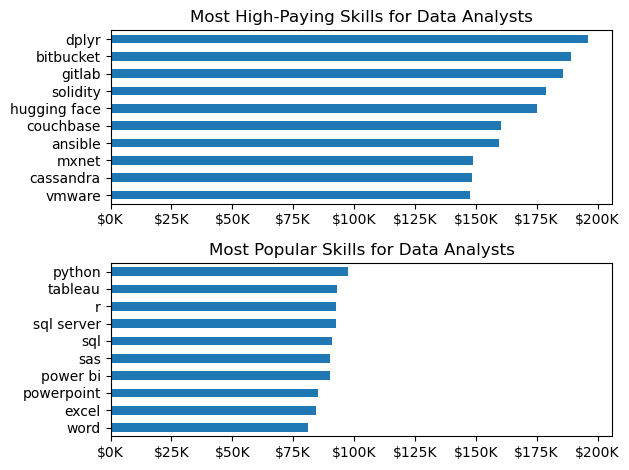

In [27]:
fig, ax = plt.subplots(2, 1)

df_toppay.plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].invert_yaxis()
ax[0].set_title('Most High-Paying Skills for Data Analysts')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

df_popular[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False) #[::-1] - более краткий вариант invert_yaxis()
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Most Popular Skills for Data Analysts')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos:f'${int(y/1000)}K'))

fig.tight_layout()